In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


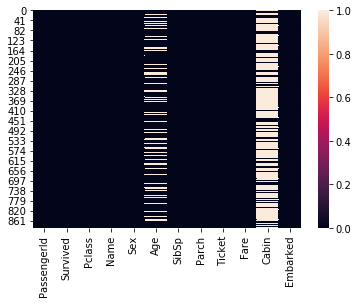

In [92]:
sns.heatmap(train.isnull())  #Shows that the age data and cabin numbers of the passengers are missing

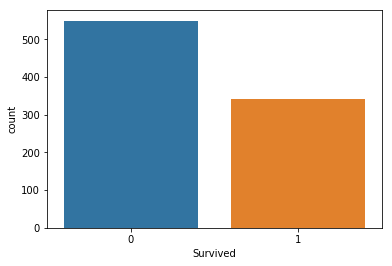

In [93]:
sns.countplot(x='Survived',data=train)   #0 :Did not survived 1:  Survive

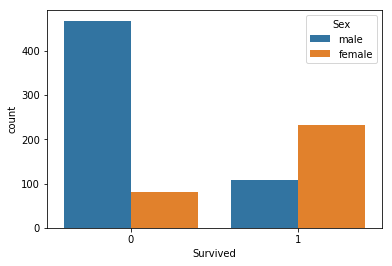

In [94]:
sns.countplot(x='Survived',hue='Sex' , data=train)   #0:Did not survived ; s1:Survive according to male and female

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


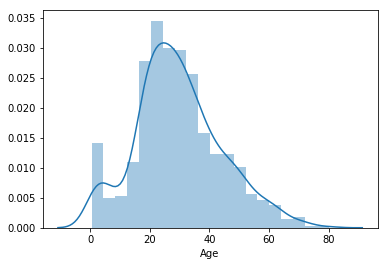

In [95]:
sns.distplot(train['Age'].dropna())  #dropna() : removes the missing or nan values from the age data column

  Filing in the missing data (AGE) of the passenger with the mean age of that class of passenger

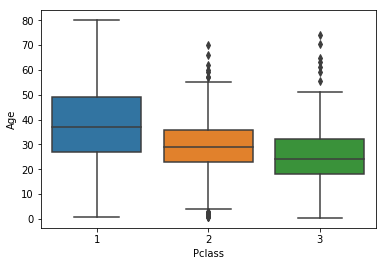

In [96]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [97]:
#Code to fill in the missing ages with the average age of that class of passenger

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37    #According to the box plot the mean of Pclass=1 is 37.(Similarly for others)
        elif Pclass==2:
            return 29
        else :
            return 24
    else:
        return Age

In [98]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

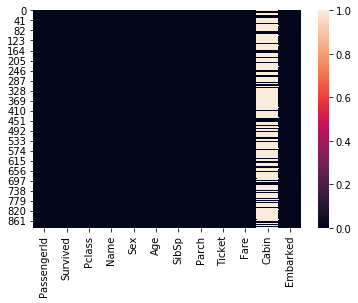

In [99]:
sns.heatmap(train.isnull())

In [100]:
#Since the cabin column is so incomplete that we drop it

train.drop('Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [101]:
pd.get_dummies(train['Sex'])

#This creates 2 columns and assigns 1 if gender is male and automatically assigns other column 0

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [102]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [103]:
#Creating dummy column

sex = pd.get_dummies(train['Sex'],drop_first=True)

#drop_first=True drops the first column since it is obvious from one olumn only.

embark = pd.get_dummies(train['Embarked'],drop_first=True)

#This had three parameters so dropping first column can still make the computer interpret the values and class it belongs to.

In [104]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [105]:
#drop unnecessary columns as dummies has been created for sex and embaked  and name is noot required.

train.drop(['Sex','Name','Embarked','PassengerId'],axis=1)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,1,35.0,1,0,113803,53.1000,C123,0,0,1
4,0,3,35.0,0,0,373450,8.0500,NaN,1,0,1
5,0,3,24.0,0,0,330877,8.4583,NaN,1,1,0
6,0,1,54.0,0,0,17463,51.8625,E46,1,0,1
7,0,3,2.0,3,1,349909,21.0750,NaN,1,0,1
8,1,3,27.0,0,2,347742,11.1333,NaN,0,0,1
9,1,2,14.0,1,0,237736,30.0708,NaN,0,0,0


In [131]:
X=train[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]

In [132]:
y=train['Survived']

In [133]:
from sklearn.cross_validation import train_test_split

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
logmodel=LogisticRegression()

In [137]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
predictions=logmodel.predict(X_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



In [141]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 40,  74]])